# Visualize and downsampled the slide scanned image

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

import tifffile as tif

In [9]:
raw_nas = "/mnt/central_nas/datasharing/Quentin/IMC_MALDI_gutenTAG/SlideScan"
exp_name = "2570"
exp_dir = os.path.join(raw_nas, exp_name)

# list out all the files in the directory
files = os.listdir(exp_dir)
# keep only tifs
files = [f for f in files if f.endswith('.tif')]
# order by alphabetical order
files.sort()
print(files)

['Craters_2570_ITO-S4.tif', 'Craters_2570_ITO-S5.tif', 'Glass_2570_20x-S1.tif', 'Glass_2570_20x-S2.tif', 'IMC_2570-S3.tif']


In [23]:
test = files[3]
test_img = tif.imread(os.path.join(exp_dir, test))
print(test_img.shape)

(34635, 34710, 3)


In [24]:
# print data type
print(test_img.dtype)

uint8


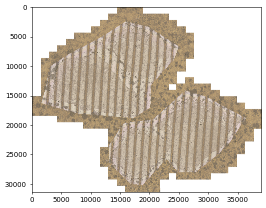

In [20]:
# plot the image with low resolution
plt.figure(dpi=50)
plt.imshow(test_img)
plt.show()

In [25]:
# downsample the image to 0.323um/pixel
# at the moment the image is 0.41um/pixel

scale = 10
new_img = test_img[::scale, ::scale]
print(new_img.shape)

(3464, 3471, 3)


In [26]:
exp_dn_dir = os.path.join(exp_dir, "downsampled")
if not os.path.exists(exp_dn_dir):
    os.makedirs(exp_dn_dir)
# save the downsampled image
tif.imwrite(os.path.join(exp_dn_dir, test), new_img)